# **Task: Stock Market Prediction And Forecasting Using Stacked LSTM**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [ ]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df = pd.read_csv(url)

### Data Preprocessing

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.sort_values('Date', inplace=True, ascending=True)

In [ ]:
data = df[['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 1:])

### Split the data into training and testing sets

In [ ]:
sequence_length = 60

In [ ]:
X = []
y = []

for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length])
    y.append(scaled_data[i + sequence_length, 1])  # 'Close' price for the next day

X, y = np.array(X), np.array(y)


In [ ]:
split_ratio = 0.8
train_size = int(split_ratio * len(X))


In [ ]:
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Build the Stacked LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units=1))

Train the model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
40/40 [==============================] - 13s 142ms/step - loss: 0.0051 - val_loss: 8.9448e-04
Epoch 2/100
40/40 [==============================] - 5s 121ms/step - loss: 0.0015 - val_loss: 8.7866e-04
Epoch 3/100
40/40 [==============================] - 6s 159ms/step - loss: 0.0012 - val_loss: 7.6063e-04
Epoch 4/100
40/40 [==============================] - 4s 108ms/step - loss: 0.0012 - val_loss: 6.6618e-04
Epoch 5/100
40/40 [==============================] - 5s 133ms/step - loss: 0.0013 - val_loss: 6.8112e-04
Epoch 6/100
40/40 [==============================] - 4s 109ms/step - loss: 9.6368e-04 - val_loss: 5.8734e-04
Epoch 7/100
40/40 [==============================] - 4s 106ms/step - loss: 9.6533e-04 - val_loss: 5.5999e-04
Epoch 8/100
40/40 [==============================] - 5s 138ms/step - loss: 9.7268e-04 - val_loss: 5.0051e-04
Epoch 9/100
40/40 [==============================] - 4s 104ms/step - loss: 8.1734e-04 - val_loss: 4.7867e-04
Epoch 10/100
40/40 [==================

Evaluate model

In [ ]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

13/13 [==============================] - 0s 30ms/step - loss: 0.0011
Test Loss: 0.0010912887519225478


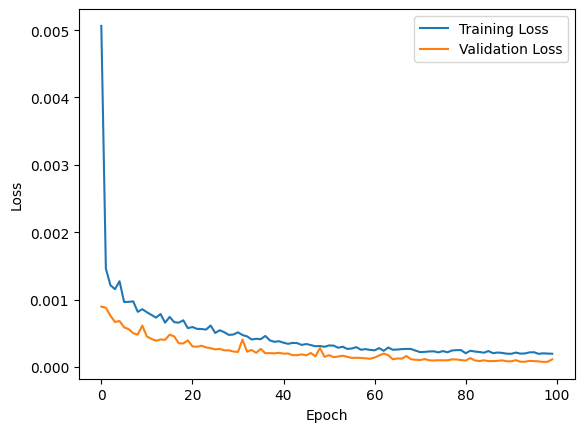

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Make Predictions

In [ ]:
y_pred = model.predict(X_test)


13/13 [==============================] - 0s 28ms/step


In [ ]:
y_pred = y_pred.reshape(-1, 1, 1)

# Inverse scale the predicted values
y_pred = scaler.inverse_transform(np.hstack((X_test[:, -1, 1:], y_pred)))


ValueError: ignored

**Predicted vs. Actual 'Close' prices**

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].values[train_size + sequence_length:], y_test_inv, label='Actual Close Price', color='blue')
plt.plot(df['Date'].values[train_size + sequence_length:], y_pred, label='Predicted Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()